<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>
<h1 align="center"><font size="5">DEVELOP MODEL TO CLASSIFICATION TYPE CUSUMER IN BANKING</font></h1>

# 1. DATASET IN PROJECT

This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant      

# 2. DATA ANALYST

# 2.1 import data

### Load all library needed:

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

print("All library was imported")

All library was imported


### Import dataset

In [7]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [8]:
df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = "columns")

In [9]:
print("Columns and feature in dataset:", df.shape)

Columns and feature in dataset: (346, 8)


### Cover dataframe to time_data object

In [10]:
df["effective_date"]= pd.to_datetime(df["effective_date"])
df["due_date"] = pd.to_datetime(df["due_date"])

In [11]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


## 2.2 Finding more infomation about data

### Cover data_time to week name

In [12]:
df["day_of_name"] = df["effective_date"].dt.day_name()

In [13]:
df["day_of_name_number"] = df["effective_date"].dt.dayofweek

In [14]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_name,day_of_name_number
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,Thursday,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,Thursday,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,Thursday,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,Friday,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,Friday,4


### Infomation about each of feature categories in dateset

In [15]:
df["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [16]:
df["Principal"].value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

In [17]:
df["terms"].value_counts()

30    184
15    148
7      14
Name: terms, dtype: int64

In [18]:
df["education"].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [19]:
df["Gender"].value_counts()

male      294
female     52
Name: Gender, dtype: int64

## 2.3 Relative about each of feature in dataset 

### Feature loan_status and  day_of_name

In [20]:
df_date_name = df[["day_of_name", "loan_status"]]
df_groupby_date_name = (df_date_name.groupby(["day_of_name"])["loan_status"]
                        .value_counts(normalize=True)
                        .rename("percentage")
                        .reset_index()
                        .sort_values("day_of_name"))
df_groupby_date_name

,day_of_name,loan_status,percentage
0,Friday,COLLECTION,0.500000
1,Friday,PAIDOFF,0.500000
2,Monday,PAIDOFF,0.965517
3,Monday,COLLECTION,0.034483
4,Saturday,PAIDOFF,0.548387
5,Saturday,COLLECTION,0.451613
6,Sunday,PAIDOFF,0.608434
7,Sunday,COLLECTION,0.391566
8,Thursday,PAIDOFF,1.000000
9,Tuesday,PAIDOFF,1.000000


<AxesSubplot:xlabel='day_of_name', ylabel='count'>

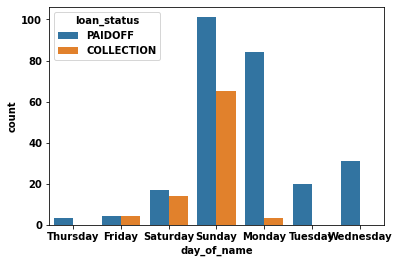

In [21]:
sns.countplot(x= "day_of_name", hue = "loan_status", data = df_date_name)

We see that people who get the loan at the end of the week don't pay it off ( the  number collection is high), so I split data in effective_date become two class: 
* Class 1: monday, tuesday, wednesday, thursday; 
* Class 2: friday, saturday, sunday.


Let's convert class 1 to 0 and class 2 to 1:

In [22]:
df["weekend"] = df["day_of_name_number"].apply(lambda x: 1 if (x> 3) else 0)

In [23]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_name,day_of_name_number,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,Thursday,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,Thursday,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,Thursday,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,Friday,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,Friday,4,1


### Feature loan_status and Gender

In [25]:
df_gender = df[["Gender", "loan_status"]]
df_gender_groupby = (df_gender.groupby(["Gender"])["loan_status"]
                     .value_counts(normalize=True))
                     
                     
df_gender_groupby.head()

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='count'>

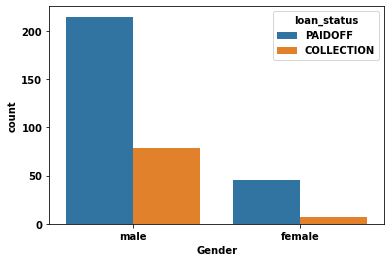

In [26]:
sns.countplot(x = "Gender", hue = "loan_status", data = df_gender)

### Feature education and loan_status

In [27]:
df_education = df[["education","loan_status"]]

<AxesSubplot:xlabel='education', ylabel='count'>

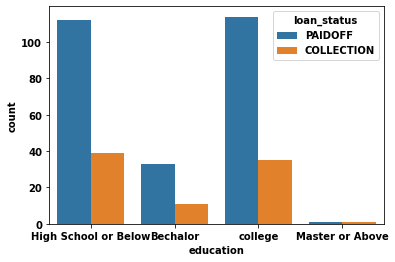

In [28]:
sns.countplot(x = "education", hue = "loan_status", data = df_education)

In [29]:
df_groupby_edu = (df_education.groupby(["education"])['loan_status']
                  .value_counts(normalize = True))
df_groupby_edu
                  

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [30]:
df_terms = df[["terms", "loan_status"]]

<AxesSubplot:xlabel='terms', ylabel='count'>

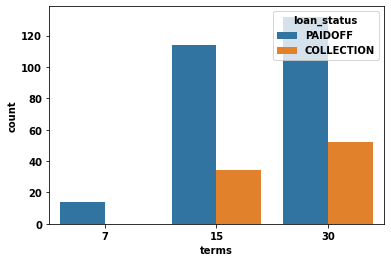

In [31]:
sns.countplot(x = "terms", hue = "loan_status", data = df_terms)

In [32]:
df_groupby_terms = df_terms.groupby(["terms"])["loan_status"].value_counts(normalize = True)
df_groupby_terms

terms  loan_status
7      PAIDOFF        1.000000
15     PAIDOFF        0.770270
       COLLECTION     0.229730
30     PAIDOFF        0.717391
       COLLECTION     0.282609
Name: loan_status, dtype: float64

In [33]:
df_terms_education = df[["terms", "education"]]

<AxesSubplot:xlabel='terms', ylabel='count'>

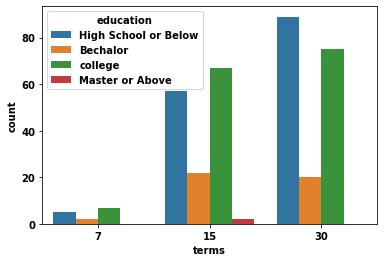

In [34]:
sns.countplot(x = "terms", hue = "education", data = df_terms_education)

In [35]:
df_terms_education_groupby = df_terms_education.groupby(["terms"])["education"].value_counts(normalize = True)
df_terms_education_groupby

terms  education           
7      college                 0.500000
       High School or Below    0.357143
       Bechalor                0.142857
15     college                 0.452703
       High School or Below    0.385135
       Bechalor                0.148649
       Master or Above         0.013514
30     High School or Below    0.483696
       college                 0.407609
       Bechalor                0.108696
Name: education, dtype: float64

In [36]:
df_terms_gender = df[["terms", "Gender"]]

<AxesSubplot:xlabel='terms', ylabel='count'>

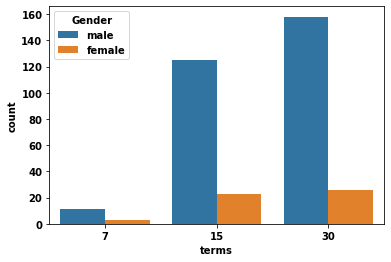

In [37]:
sns.countplot(x = "terms", hue = "Gender", data = df_terms_gender)

# 3. PRE - PROCESSING DATA

## 3.1 Cover categories feature to numberal feature

In [38]:
df["Gender"] = df["Gender"].replace(to_replace = ["male", "female"], value = [0, 1])
df["Gender"]

0      0
1      1
2      0
3      1
4      0
      ..
341    0
342    0
343    0
344    0
345    0
Name: Gender, Length: 346, dtype: int64

In [39]:
df["loan_status"] = df["loan_status"].replace(to_replace = ["PAIDOFF", "COLLECTION"], value = [0, 1])

In [40]:
df["education"] = df["education"].replace(to_replace = ["High School or Below", "college", "Bechalor", "Master or Above"]
                                          , value = [0, 1, 2, 3])

In [41]:
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_name,day_of_name_number,weekend
0,0,1000,30,2016-09-08,2016-10-07,45,0,0,Thursday,3,0
1,0,1000,30,2016-09-08,2016-10-07,33,2,1,Thursday,3,0
2,0,1000,15,2016-09-08,2016-09-22,27,1,0,Thursday,3,0
3,0,1000,30,2016-09-09,2016-10-08,28,1,1,Friday,4,1
4,0,1000,30,2016-09-09,2016-10-08,29,1,0,Friday,4,1


## 3.2 Train and test dataset

In [42]:
y = df["loan_status"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [43]:
x = df[["Principal", "terms", "age", "education", "Gender", "weekend"]]
x.head()

,Principal,terms,age,education,Gender,weekend
0,1000,30,45,0,0,0
1,1000,30,33,2,1,0
2,1000,15,27,1,0,0
3,1000,30,28,1,1,1
4,1000,30,29,1,0,1


In [44]:
x = x.to_numpy()

In [45]:
from sklearn.preprocessing import StandardScaler

sta = preprocessing.StandardScaler()
sta.fit(x)
x = sta.transform(x)

In [46]:
x

array([[ 0.51578458,  0.92071769,  2.33152555, -0.99512471, -0.42056004,
        -1.20577805],
       [ 0.51578458,  0.92071769,  0.34170148,  1.83872837,  2.37778177,
        -1.20577805],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42180183, -0.42056004,
        -1.20577805],
       ...,
       [-1.31458942, -0.95911111,  1.33661351,  0.42180183, -0.42056004,
        -1.20577805],
       [ 0.51578458,  0.92071769, -0.48739188,  0.42180183, -0.42056004,
        -1.20577805],
       [ 0.51578458,  0.92071769, -0.81902922,  0.42180183, -0.42056004,
        -1.20577805]])

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [48]:
print("The shape of x_train and x_test:", x_train.shape, x_test.shape)
print("The shape of y_train and y_test:", y_train.shape, y_test.shape)

The shape of x_train and x_test: (259, 6) (87, 6)
The shape of y_train and y_test: (259,) (87,)


# 3. MODELLING

## 3.1 K- Nearest Neighbor

### Finding the best K for dataset

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [74]:
k_nearest = 10

accuracy_knearest = np.zeros(k_nearest - 1)

for n in range(1, k_nearest):
    #train and predict model
    KNN = KNeighborsClassifier(n_neighbors = n)
    kneighbor_model = KNN.fit(x_train, y_train)
    y_pred_KNN_demo = kneighbor_model.predict(x_test)
    accuracy_knearest[n - 1] = metrics.accuracy_score(y_test, y_pred_KNN_demo)
    
accuracy_knearest

array([0.68965517, 0.79310345, 0.77011494, 0.85057471, 0.82758621,
       0.82758621, 0.82758621, 0.83908046, 0.79310345])

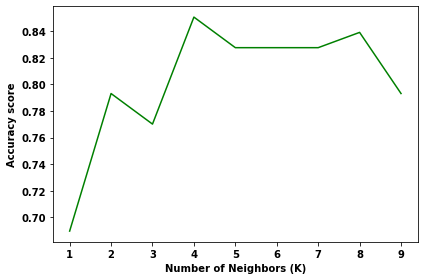

In [75]:
plt.plot(range(1, k_nearest), accuracy_knearest, "g")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy score")
plt.tight_layout()
plt.show()

### Using K = 4 to predict loan_status 

In [76]:
k = 4
KNN_offical = KNeighborsClassifier(n_neighbors = 4)
KNN_model_official = KNN_offical.fit(x_train, y_train)

y_pred_KNN = KNN_model_official.predict(x_test)

In [83]:
f1_score_KNN = f1_score(y_test,y_pred_KNN)
jaccard_score_KNN = jaccard_score(y_test, y_pred_KNN)
log_loss_KNN = log_loss(y_test, y_pred_KNN)

In [91]:
print("F1_score value in KNN model:", round(f1_score_KNN, 4))
print("Jaccard score value in KNN model:", round(jaccard_score_KNN, 4))
print("Log loss value in KNN model:", round(log_loss_KNN, 4))

F1_score value in KNN model: 0.4348
Jaccard score value in KNN model: 0.2778
Log loss value in KNN model: 5.161


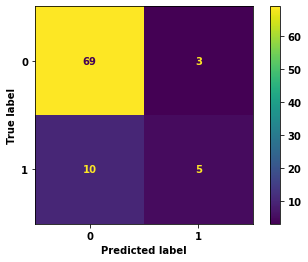

In [84]:
confusion_matrix_KNN = plot_confusion_matrix(KNN_model_official,x_test, y_test)

## 3.2 Decision Tree Classification

In [160]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = "gini", 
                                       max_depth = 6, random_state= 0)
tree_model = decision_tree.fit(x_train, y_train)

y_pred_tree = tree_model.predict(x_test)

[Text(272.8, 403.81714285714287, 'X[5] <= -0.188\ngini = 0.398\nsamples = 259\nvalue = [188, 71]'),
 Text(148.8, 341.69142857142856, 'X[2] <= 1.254\ngini = 0.039\nsamples = 101\nvalue = [99, 2]'),
 Text(74.4, 279.5657142857143, 'X[2] <= -0.404\ngini = 0.022\nsamples = 89\nvalue = [88, 1]'),
 Text(49.6, 217.44, 'X[2] <= -0.57\ngini = 0.067\nsamples = 29\nvalue = [28, 1]'),
 Text(24.8, 155.3142857142857, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(74.4, 155.3142857142857, 'X[1] <= -0.019\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(49.6, 93.18857142857144, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(99.2, 93.18857142857144, 'X[3] <= -0.287\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(74.4, 31.062857142857126, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(124.0, 31.062857142857126, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(99.2, 217.44, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(223.20000000000002, 279.5657142857143, 'X[2] <= 1.42\ngini =

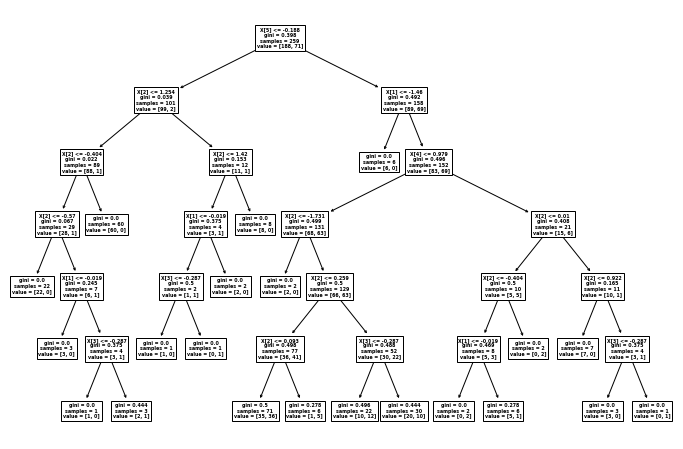

In [161]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(tree_model.fit(x_train, y_train))

In [162]:
f1_score_tree = f1_score(y_test, y_pred_tree)
jaccard_score_tree = jaccard_score(y_test, y_pred_tree)
log_loss_tree = log_loss(y_test, y_pred_tree)

In [163]:
print("F1_score value in Decision tree model:", round(f1_score_tree, 4))
print("Jaccard score value in Decision tree model:", round(jaccard_score_tree, 4))
print("Log loss value in Decision tree model:", round(log_loss_tree, 4))

F1_score value in Decision tree model: 0.4314
Jaccard score value in Decision tree model: 0.275
Log loss value in Decision tree model: 11.5132


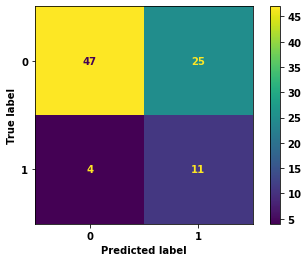

In [164]:
confusion_matrix_tree = plot_confusion_matrix(tree_model, x_test, y_test)

## 3.3 Support Vector Machine

In [207]:
from sklearn import svm

svm = svm.SVC(C = 3, kernel = "rbf")
SVM_model = svm.fit(x_train, y_train)

y_pred_svm = SVM_model.predict(x_test)

In [208]:
f1_score_svm = f1_score(y_test, y_pred_svm)
jaccard_score_svm = jaccard_score(y_test, y_pred_svm)
log_loss_svm = log_loss(y_test, y_pred_svm)

In [209]:
print("F1_score value in Support Vector Machine model:", round(f1_score_svm, 4))
print("Jaccard score value in SVM model:", round(jaccard_score_svm, 4))
print("Log loss value in SVM model:", round(log_loss_svm, 4))

F1_score value in Support Vector Machine model: 0.3429
Jaccard score value in SVM model: 0.2069
Log loss value in SVM model: 9.1311


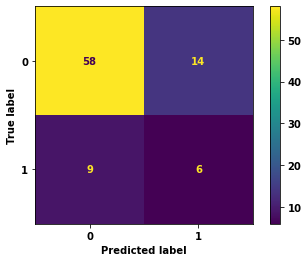

In [210]:
confusion_matrix_svm = plot_confusion_matrix(SVM_model, x_test, y_test)

## 3.4 Logistic Regression

In [236]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 3, solver = "liblinear")

log_reg_model = log_reg.fit(x_train, y_train)

y_pred_logistic = log_reg_model.predict(x_test)

In [237]:
f1_score_logistic = f1_score(y_test, y_pred_logistic)
jaccard_score_logistic = jaccard_score(y_test, y_pred_logistic)
log_loss_logistic = log_loss(y_test, y_pred_logistic)

In [238]:
print("F1_score value in Logistic regression model:", round(f1_score_logistic, 4))
print("Jaccard score value in Logistic regression model:", round(jaccard_score_logistic, 4))
print("Log loss value in logistic regression model:", round(log_loss_logistic, 4))

F1_score value in Logistic regression model: 0.24
Jaccard score value in Logistic regression model: 0.1364
Log loss value in logistic regression model: 7.543


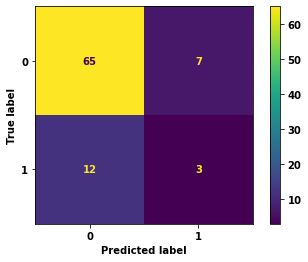

In [239]:
confusion_matrix_logistic = plot_confusion_matrix(log_reg_model, x_test, y_test)

# 4. EVALUATION AND COMPARISE MODELING

In [240]:
data_model= [["KNN", f1_score_KNN, jaccard_score_KNN, log_loss_KNN],
             ["Decision Tree", f1_score_tree, jaccard_score_tree, log_loss_tree],
             ["SVM", f1_score_svm, jaccard_score_svm, log_loss_svm],
             ["Logistic Regression", f1_score_logistic, jaccard_score_logistic, log_loss_logistic]]
df_data_model = pd.DataFrame(data_model, columns = ["Model", "F1 Score", "Jaccard Score", "Log Loss Score"])

In [241]:
df_data_model

,Model,F1 Score,Jaccard Score,Log Loss Score
0,KNN,0.434783,0.277778,5.160994
1,Decision Tree,0.431373,0.275000,11.513155
2,SVM,0.342857,0.206897,9.131070
3,Logistic Regression,0.240000,0.136364,7.543016


<AxesSubplot:xlabel='Model', ylabel='F1 Score'>

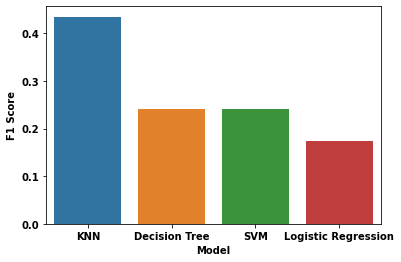

In [242]:
sns.barplot(x = "Model", y = "F1 Score", data = df_date_model)

<AxesSubplot:xlabel='Model', ylabel='Jaccard Score'>

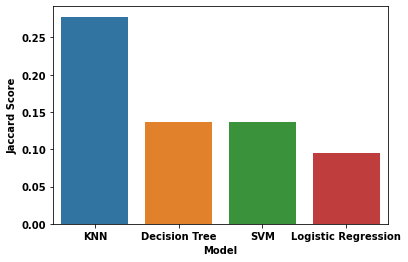

In [243]:
sns.barplot(x = "Model", y = "Jaccard Score", data = df_date_model)

<AxesSubplot:xlabel='Model', ylabel='Log Loss Score'>

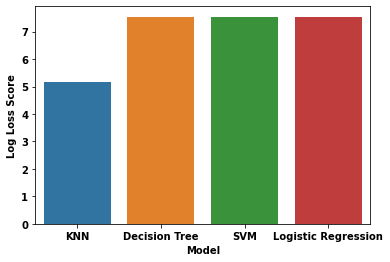

In [245]:
sns.barplot(x = "Model", y = "Log Loss Score", data = df_date_model)

### After evaluate model using F1 score, Jaccard score, Log-loss score, the best model to classificate loan status is KNN model.

# THE END